In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


In [8]:
# Task 5 : Binary Classification with Logistic Regression
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.9561

Confusion Matrix:
[[39  4]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



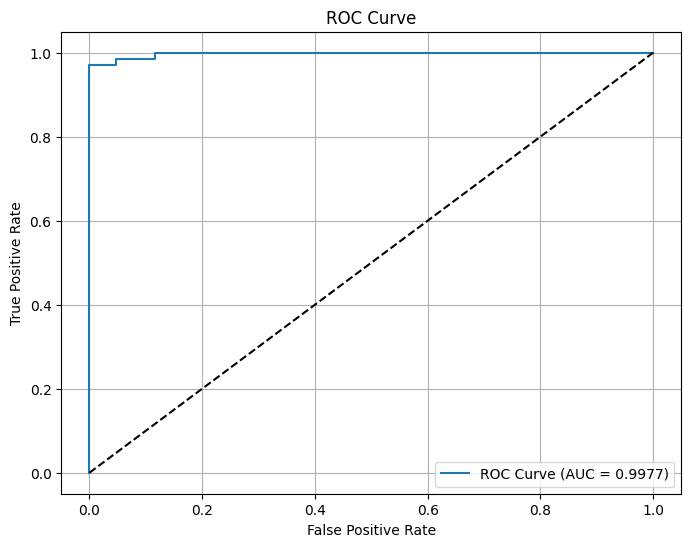

In [9]:
# Evaluation Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC, AUC
y_probs = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Task 6: Threshold Tuning and Probability Interpretation
thresholds_to_test = [0.3, 0.5, 0.7]

for threshold in thresholds_to_test:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"\nThreshold: {threshold}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_thresh))


Threshold: 0.3
F1 Score: 0.9655
Confusion Matrix:
[[39  4]
 [ 1 70]]

Threshold: 0.5
F1 Score: 0.9655
Confusion Matrix:
[[39  4]
 [ 1 70]]

Threshold: 0.7
F1 Score: 0.9790
Confusion Matrix:
[[41  2]
 [ 1 70]]


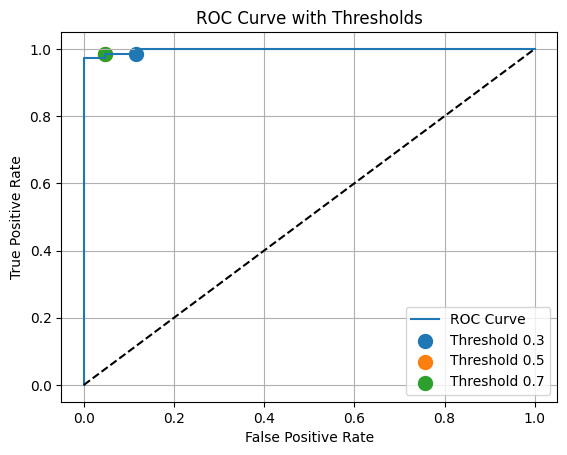

In [11]:
# Plot ROC with threshold markers
plt.plot(fpr, tpr, label="ROC Curve")
for thresh in thresholds_to_test:
    idx = np.argmin(np.abs(thresholds - thresh))
    plt.scatter(fpr[idx], tpr[idx], label=f'Threshold {thresh}', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Thresholds")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Task 7
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using multinomial logistic regression
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_multi.fit(X_train, y_train)
y_pred = model_multi.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\bhada\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
